In [66]:
#Tạo thư mục
import os, shutil
#Đường dẫn raw
original_dataset_dir = "C:/Users/nqan1/OneDrive/Documents/Coding_2022/Coding_Project/XuLyAnh/FireDetectionWeb/Raw_Data/fire_dataset";
base_dir = "C:/Users/nqan1/OneDrive/Documents/Coding_2022/Coding_Project/XuLyAnh/FireDetectionWeb/Pre_Processing_Data/Output/fire_Detection_Dataset";
if not os.path.exists(base_dir):
        os.mkdir(base_dir)
train_dir = os.path.join(base_dir, 'training')
if not os.path.exists(train_dir):
        os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
if not os.path.exists(validation_dir):
        os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
if not os.path.exists(test_dir):
        os.mkdir(test_dir)


In [60]:
train_fire_dir = os.path.join(train_dir, 'fire')
if not os.path.exists(train_fire_dir):
        os.mkdir(train_fire_dir)
train_non_fire_dir = os.path.join(train_dir, 'non_fire')
if not os.path.exists(train_non_fire_dir):
        os.mkdir(train_non_fire_dir)

In [61]:

validation_fire_dir = os.path.join(validation_dir, 'fire')
if not os.path.exists(validation_fire_dir):
        os.mkdir(validation_fire_dir)
validation_non_fire_dir = os.path.join(validation_dir, 'non_fire')
if not os.path.exists(validation_non_fire_dir):
        os.mkdir(validation_non_fire_dir)

In [62]:
fnames = ['fire.{}.png'.format(i) for i in range(1,260)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_fire_dir, fname)
    shutil.copyfile(src, dst)

In [64]:
import cv2
fnames = ['fire.{}.png'.format(i) for i in range(260, 520)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_fire_dir, fname)
    shutil.copyfile(src, dst)


In [73]:
fnames = ['fire.{}.png'.format(i) for i in range(520, 755)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dir+"/"+"Test_Data", fname)
    shutil.copyfile(src, dst)

In [72]:
fnames = ['non_fire.{}.png'.format(i) for i in range(1,81)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_non_fire_dir, fname)
    shutil.copyfile(src, dst)
 
fnames = ['non_fire.{}.png'.format(i) for i in range(81, 162)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_non_fire_dir, fname)
    shutil.copyfile(src, dst)
   
fnames = ['non_fire.{}.png'.format(i) for i in range(162, 244)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dir+"/"+"Test_Data", fname)
    shutil.copyfile(src, dst)

In [32]:
print('total training fire image: ', len(os.listdir(train_fire_dir)))

total training fire image:  259


In [33]:
from keras import layers
from keras import models
#Khởi tạo models Sequential 
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape=(150, 150, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 conv2d_11 (Conv2D)          (None, 146, 146, 32)      9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 71, 71, 64)        18496     
                                                                 
 conv2d_13 (Conv2D)          (None, 69, 69, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 34, 34, 64)       0         
 2D)                                                  

In [34]:
from keras import optimizers
model.compile(loss='binary_crossentropy',optimizer= optimizers.Adam(learning_rate=1e-4),metrics=['acc'],run_eagerly=True)

In [56]:
from keras.preprocessing.image import ImageDataGenerator
#rescale về [0,1] để xử lý
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150,150),batch_size=20,class_mode='binary')

Found 339 images belonging to 2 classes.


In [57]:
for data_batch, labels_batch in train_generator :
    print('data batch shape:', data_batch.shape)
    print('data batch shape:', data_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
data batch shape: (20, 150, 150, 3)


In [75]:
validation_generator = valid_datagen.flow_from_directory(validation_dir, target_size=(150,150), batch_size=20, class_mode='binary')
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(150,150), batch_size=1, class_mode='binary')


Found 341 images belonging to 2 classes.
Found 317 images belonging to 1 classes.


In [68]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=10,
    epochs=5,
    validation_data = validation_generator,
    validation_steps=10
)


Epoch 1/5


C:\Users\nqan1\AppData\Local\Temp\ipykernel_24468\2447844009.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


KeyboardInterrupt: 

In [39]:
model.save ('fire_and_nonfire.h5')

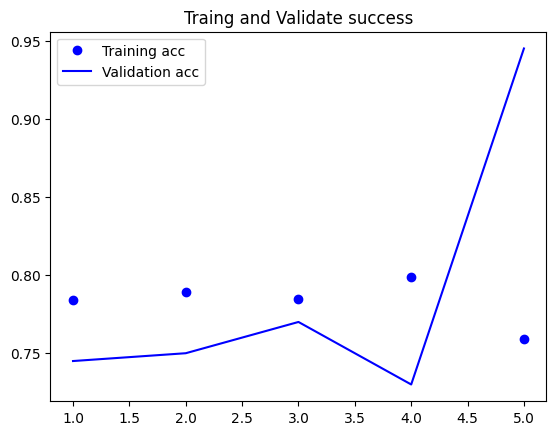

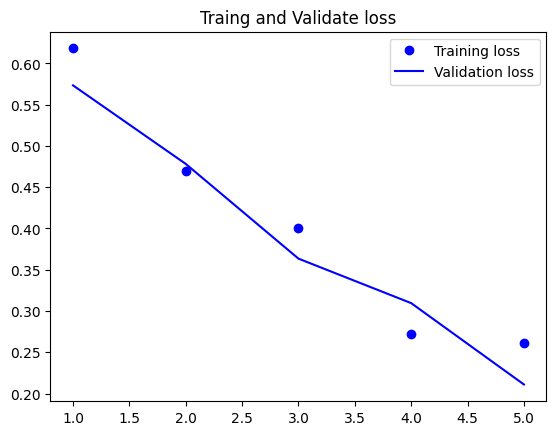

In [40]:
import matplotlib.pyplot as plt
acc=history.history['acc']
val_acc= history.history['val_acc']
loss=  history.history['loss']
val_loss = history.history['val_loss']
epochs= range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label= 'Training acc')
plt.plot(epochs,val_acc,'b',label= 'Validation acc')
plt.title('Traing and Validate success')
plt.legend()
plt.figure()
plt.plot(epochs,loss,'bo',label= 'Training loss')
plt.plot(epochs,val_loss,'b',label= 'Validation loss')
plt.title('Traing and Validate loss')
plt.legend()
plt.show()

1/1 [==============================] - 0s 43ms/step
0.0
[[0.50100785]]
(1, 150, 150, 3)
[0.]


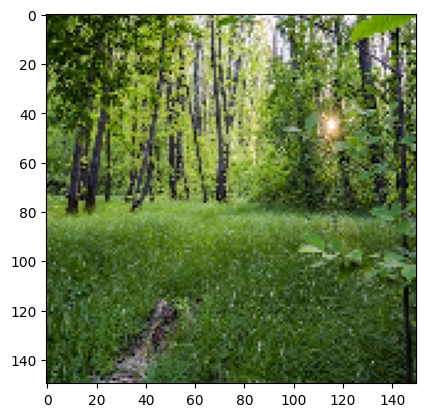

In [115]:
img, label = test_generator.next()

aaa = model.predict(img)

print('{}'.format(label[0], ))
print(aaa)
print(img.shape)
idx = ( test_generator.batch_index -1)* test_generator.batch_size
print(test_generator.filenames[idx: idx + test_generator.batch_size])  

    
plt.imshow(img[0])
plt.show()